In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
# load dataset
df =pd.read_csv('lifestyle.csv' )
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [4]:
df.shape

(374, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [6]:
df.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
dtype: int64

In [7]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [8]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [11]:
# droping redudant data, the data we do not need for our analysis and modelling
df= df.drop(['Person ID', 'Occupation'], axis= 1)


In [12]:
df.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [13]:
df['Sleep Disorder']

0             None
1             None
2             None
3      Sleep Apnea
4      Sleep Apnea
          ...     
369    Sleep Apnea
370    Sleep Apnea
371    Sleep Apnea
372    Sleep Apnea
373    Sleep Apnea
Name: Sleep Disorder, Length: 374, dtype: object

In [14]:
df.columns

Index(['Gender', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

In [15]:
df.dtypes

Gender                      object
Age                          int64
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [16]:
# Label encoding
cat_type = pd.CategoricalDtype(categories=["Normal", "Normal weight", "Overweight", "Obese"], ordered=True)
df['BMI_Code'] = df['BMI Category'].astype(cat_type).cat.codes


In [17]:
df['BMI_Code']

0      2
1      0
2      0
3      3
4      3
      ..
369    2
370    2
371    2
372    2
373    2
Name: BMI_Code, Length: 374, dtype: int8

In [18]:
df = df.drop(columns=['BMI Category'])

In [19]:
df.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,BMI_Code
0,Male,27,6.1,6,42,6,126/83,77,4200,None,2
1,Male,28,6.2,6,60,8,125/80,75,10000,None,0
2,Male,28,6.2,6,60,8,125/80,75,10000,None,0
3,Male,28,5.9,4,30,8,140/90,85,3000,Sleep Apnea,3
4,Male,28,5.9,4,30,8,140/90,85,3000,Sleep Apnea,3


In [20]:
gender_type = pd.CategoricalDtype(categories=["Male", "Female"], ordered=True)
df['Gender_en'] = df['Gender'].astype(gender_type).cat.codes
df = df.drop(columns=['Gender'])

In [21]:
df.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,BMI_Code,Gender_en
0,27,6.1,6,42,6,126/83,77,4200,None,2,0
1,28,6.2,6,60,8,125/80,75,10000,None,0,0
2,28,6.2,6,60,8,125/80,75,10000,None,0,0
3,28,5.9,4,30,8,140/90,85,3000,Sleep Apnea,3,0
4,28,5.9,4,30,8,140/90,85,3000,Sleep Apnea,3,0


In [23]:
sleep_type = pd.CategoricalDtype(categories=["None", "Insomnia", "Sleep Apnea"], ordered=True)
df['SleepDisorder_en'] = df['Sleep Disorder'].astype(sleep_type).cat.codes
df = df.drop(columns=['Sleep Disorder'])

In [24]:
df.dtypes

Age                          int64
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
BMI_Code                      int8
Gender_en                     int8
SleepDisorder_en              int8
dtype: object

In [25]:
df.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,BMI_Code,Gender_en,SleepDisorder_en
0,27,6.1,6,42,6,126/83,77,4200,2,0,0
1,28,6.2,6,60,8,125/80,75,10000,0,0,0
2,28,6.2,6,60,8,125/80,75,10000,0,0,0
3,28,5.9,4,30,8,140/90,85,3000,3,0,2
4,28,5.9,4,30,8,140/90,85,3000,3,0,2


In [26]:
# Split Blood Pressure into two columns
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True)

# Convert to numeric
df['Systolic_BP'] = pd.to_numeric(df['Systolic_BP'])
df['Diastolic_BP'] = pd.to_numeric(df['Diastolic_BP'])

# Drop original if not needed
df = df.drop(columns=['Blood Pressure'])

df.head()


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,BMI_Code,Gender_en,SleepDisorder_en,Systolic_BP,Diastolic_BP
0,27,6.1,6,42,6,77,4200,2,0,0,126,83
1,28,6.2,6,60,8,75,10000,0,0,0,125,80
2,28,6.2,6,60,8,75,10000,0,0,0,125,80
3,28,5.9,4,30,8,85,3000,3,0,2,140,90
4,28,5.9,4,30,8,85,3000,3,0,2,140,90


### Distribution

Seaborn function: sns.kdeplot, sns.histplotsns, sns.distplot,

1. Continuous Variables Distribution

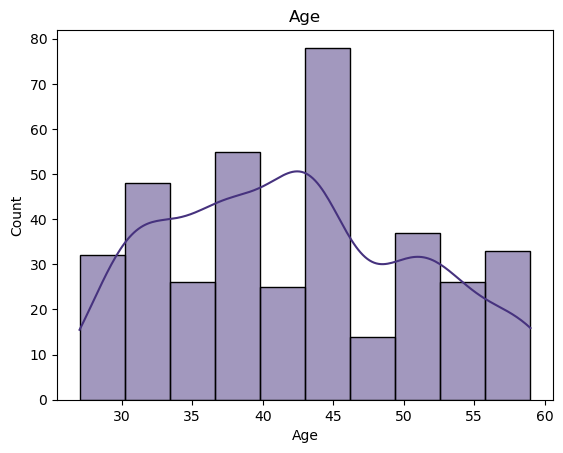

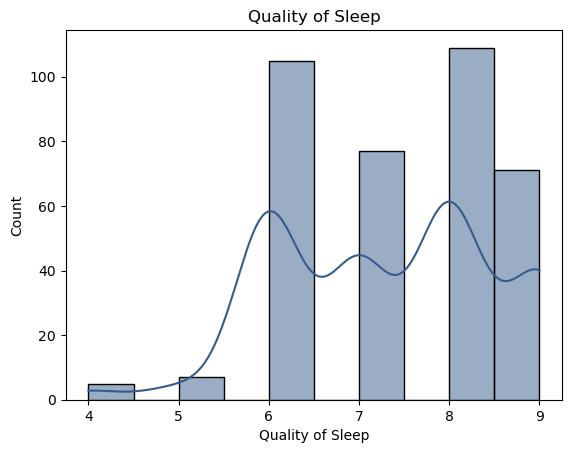

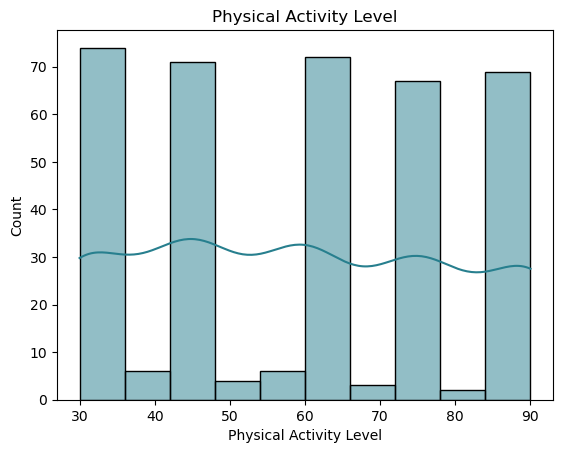

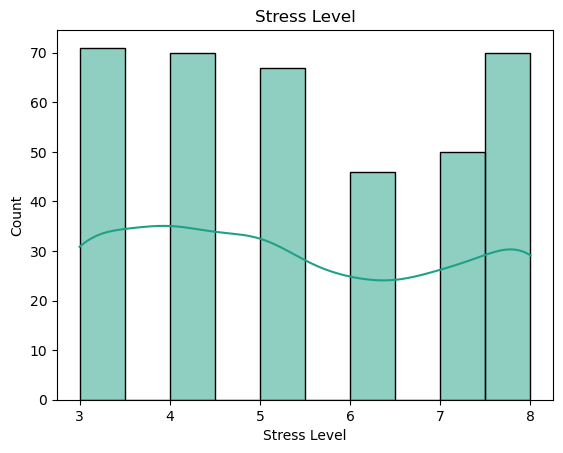

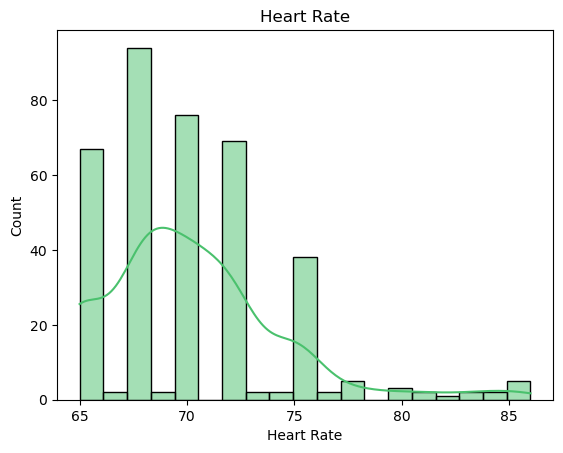

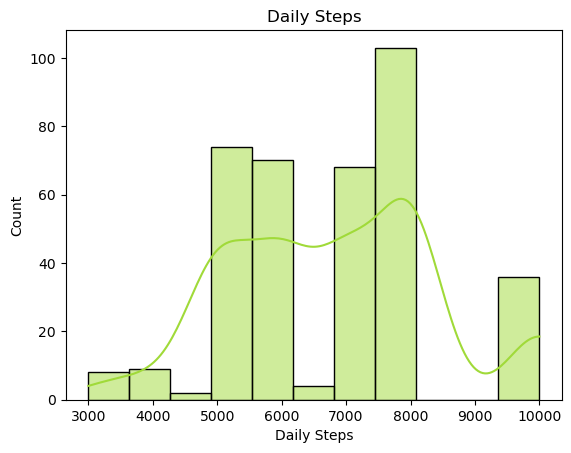

In [35]:
numeric_cols = [
    "Age", "Sleep Duration", "Quality of Sleep",
    "Physical Activity Level", "Stress Level",
    "Heart Rate", "Daily Steps"
]

palette = sns.color_palette("viridis", len(numeric_cols))
for i, col in enumerate(numeric_cols):       
    if df[col].dtype != 'object':  
        sns.histplot(df[col], kde=True, color= palette[i])
        plt.title(col)
        plt.show()

2. Categorical Variables Distribution

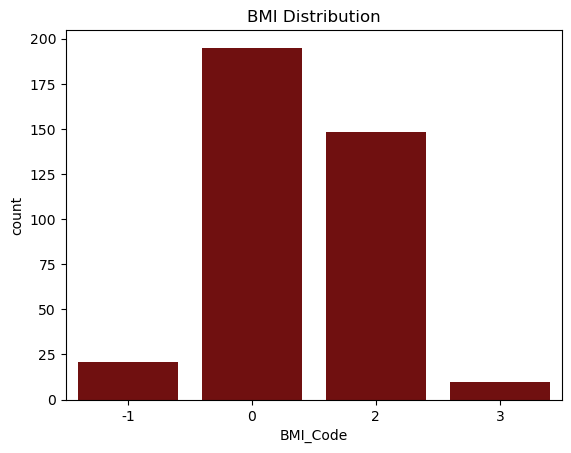

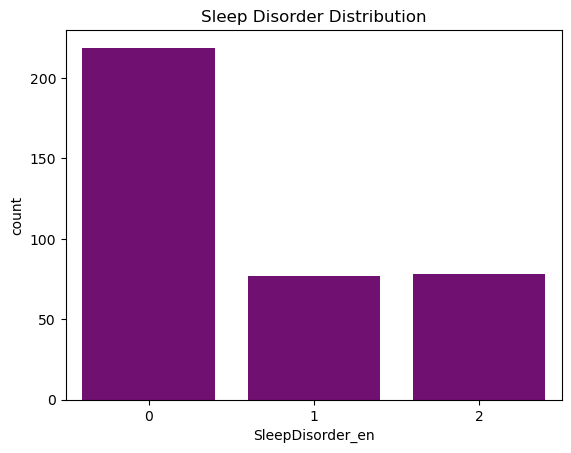

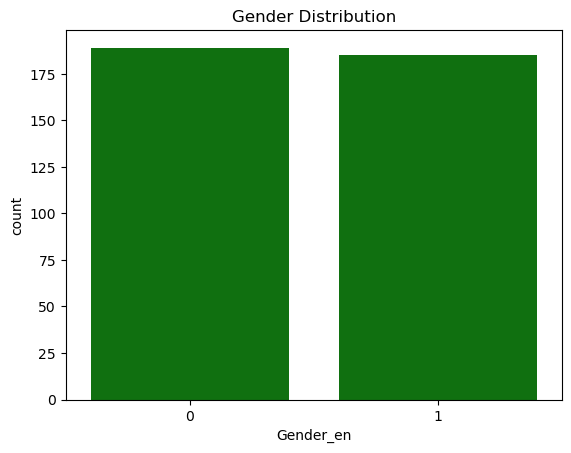

In [28]:
# BMI distribution
sns.countplot(data=df, x="BMI_Code", color="maroon")
plt.title("BMI Distribution")
plt.show()
sns.countplot(data=df, x="SleepDisorder_en", color="purple")
plt.title("Sleep Disorder Distribution")
plt.show()
# Gender distribution
sns.countplot(data=df, x="Gender_en", color= "Green")
plt.title("Gender Distribution")
plt.show()

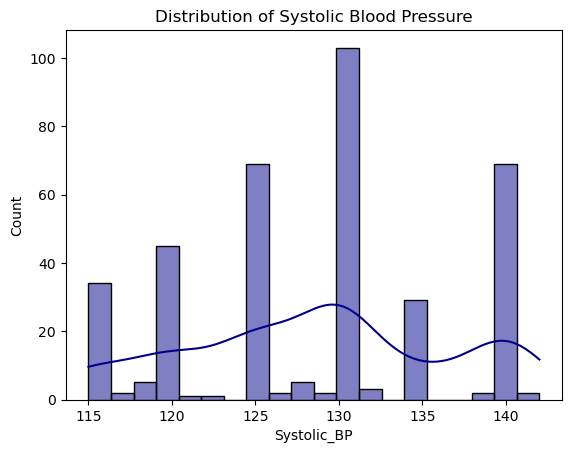

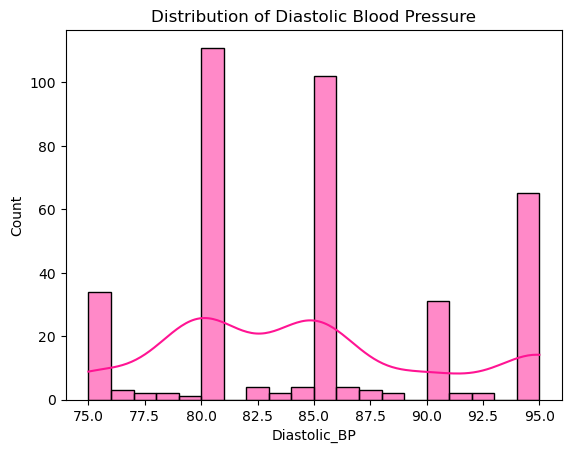

In [33]:
#Blood pressure
sns.histplot(df['Systolic_BP'], bins=20, kde=True, color="darkblue")
plt.title("Distribution of Systolic Blood Pressure")
plt.show()

sns.histplot(df['Diastolic_BP'], bins=20, kde=True, color= "deeppink")
plt.title("Distribution of Diastolic Blood Pressure")
plt.show()

### Ouliers

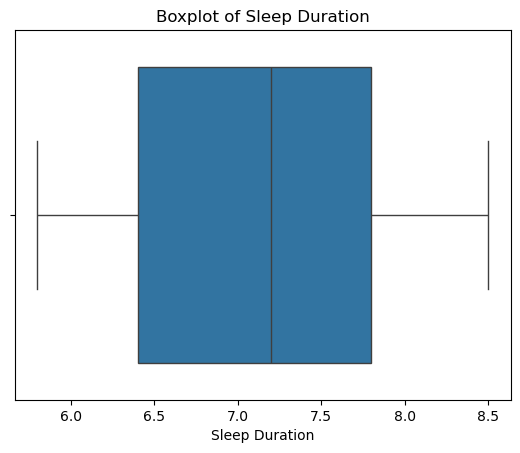

In [36]:
#Chek for ouliers
sns.boxplot(x=df['Sleep Duration'])
plt.title("Boxplot of Sleep Duration")
plt.show()

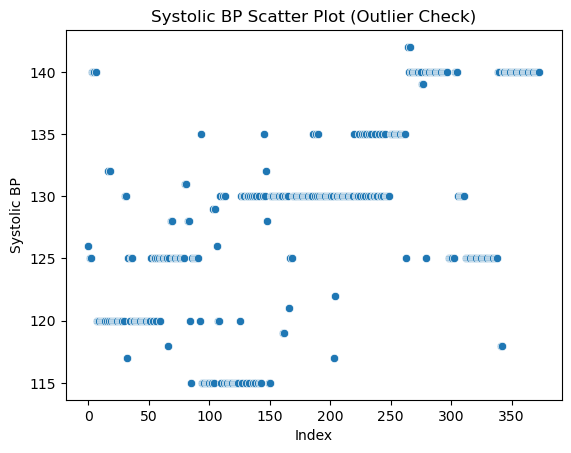

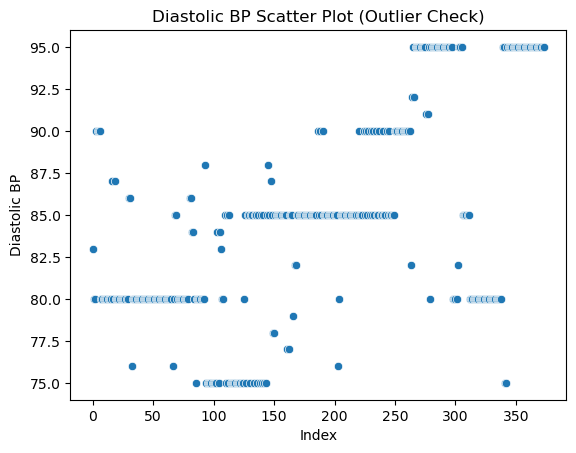

In [40]:
sns.scatterplot(x=df.index, y=df['Systolic_BP'])
plt.title("Systolic BP Scatter Plot (Outlier Check)")
plt.xlabel("Index")
plt.ylabel("Systolic BP")
plt.show()

sns.scatterplot(x=df.index, y=df['Diastolic_BP'])
plt.title("Diastolic BP Scatter Plot (Outlier Check)")
plt.xlabel("Index")
plt.ylabel("Diastolic BP")
plt.show()

In [43]:
def bp_category(systolic, diastolic):
    if systolic < 120 and diastolic < 80:
        return "Normal"
    elif 120 <= systolic < 130 and diastolic < 80:
        return "Elevated"
    elif (130 <= systolic < 140) or (80 <= diastolic < 90):
        return "Hypertension Stage 1"
    else:
        return "Hypertension Stage 2"

df['BP_Category'] = df.apply(lambda row: bp_category(row['Systolic_BP'], row['Diastolic_BP']), axis=1)


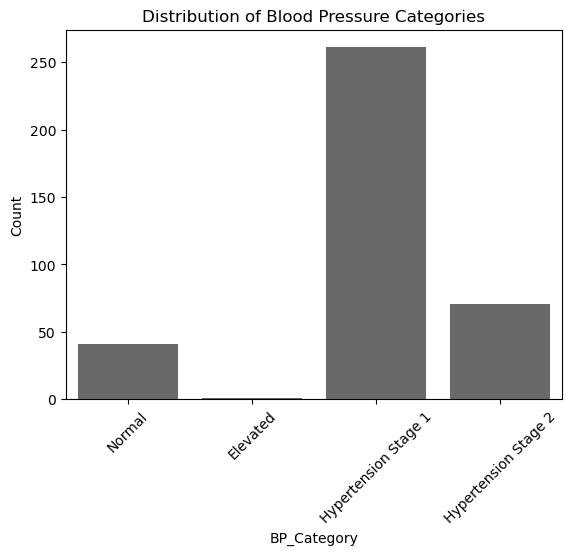

In [52]:
sns.countplot(x=df['BP_Category'], order=['Normal', 'Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2'], color= "dimgray")
plt.title("Distribution of Blood Pressure Categories")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

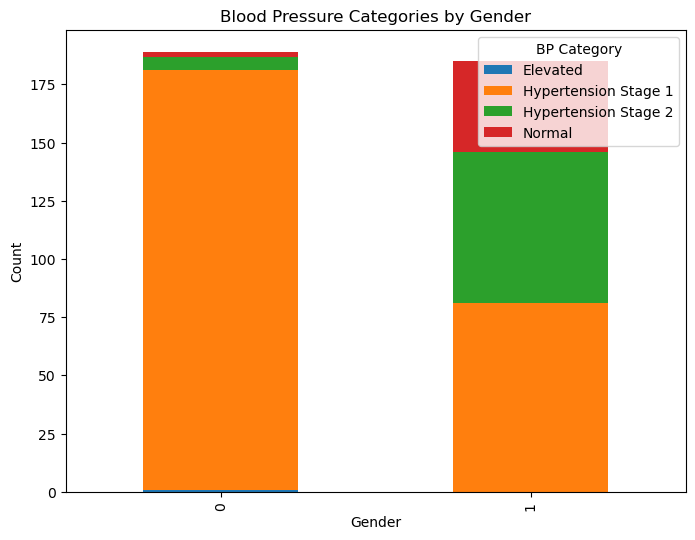

In [53]:
# Create a crosstab (counts of BP categories by Gender)
bp_gender = pd.crosstab(df['Gender_en'], df['BP_Category'])

# Plot as stacked bar
bp_gender.plot(kind='bar', stacked=True, figsize=(8,6))

plt.title("Blood Pressure Categories by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="BP Category")
plt.show()

### Relationahip Analysis

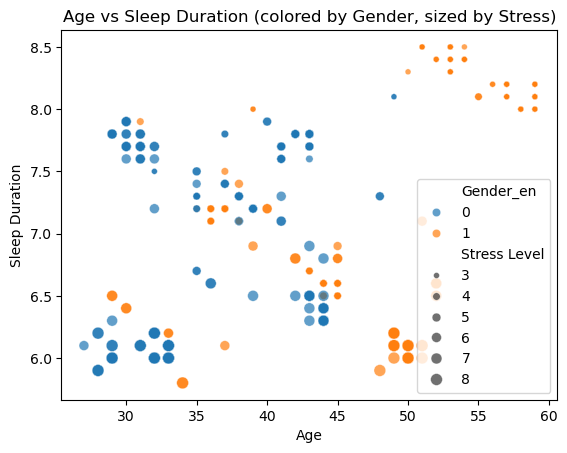

In [57]:
sns.scatterplot(data=df, x='Age', y='Sleep Duration', hue='Gender_en', size='Stress Level', alpha=0.7)
plt.title("Age vs Sleep Duration (colored by Gender, sized by Stress)")
plt.show()


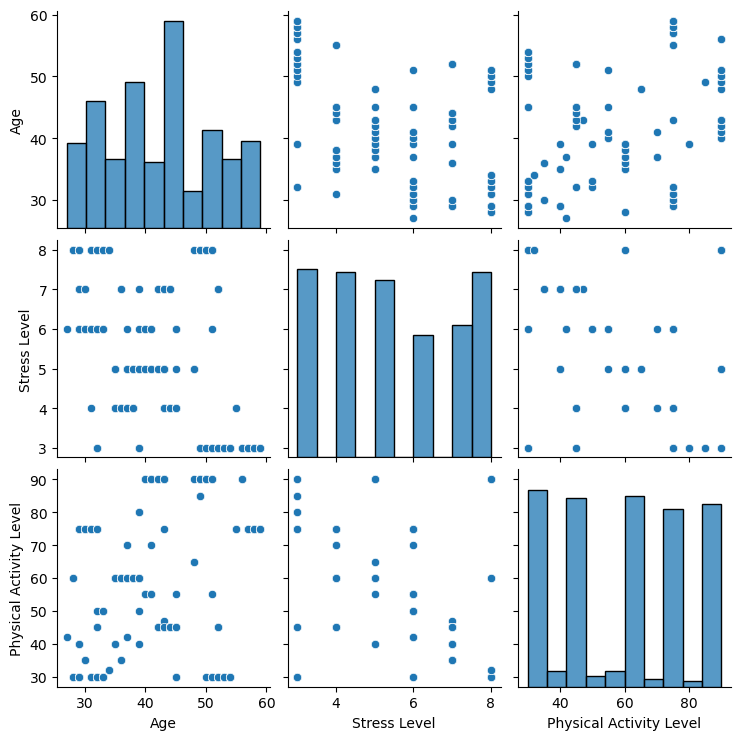

In [79]:
sns.pairplot(df[['Age','Stress Level','Physical Activity Level','BP_Category']])
plt.show()


In [60]:
df.columns

Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Heart Rate', 'Daily Steps', 'BMI_Code', 'Gender_en',
       'SleepDisorder_en', 'Systolic_BP', 'Diastolic_BP', 'BP_Category'],
      dtype='object')

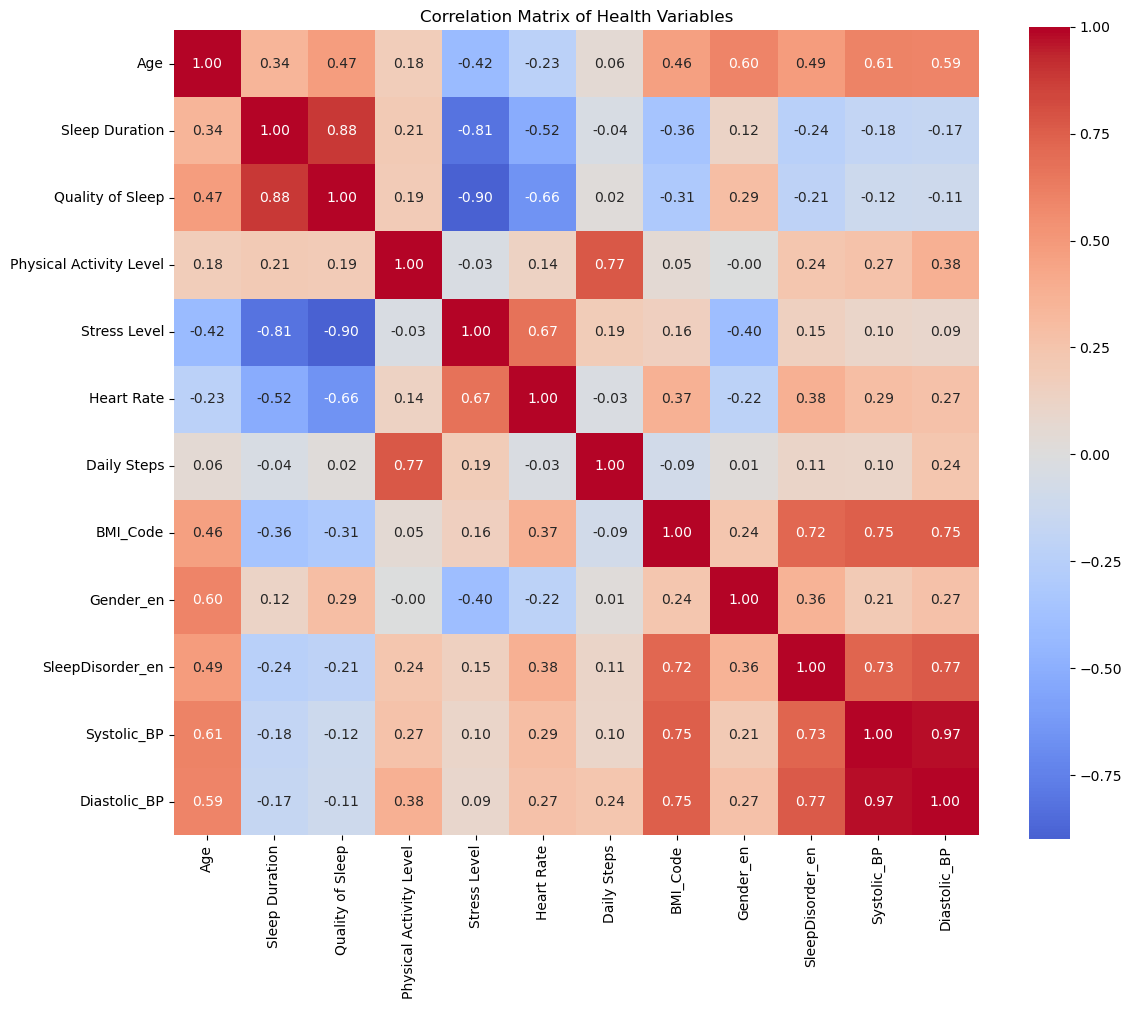

In [62]:
# numeric/encoded variables 
correlation_vars = ['Age', 'Sleep Duration', 'Quality of Sleep', 
                   'Physical Activity Level', 'Stress Level', 'Heart Rate', 
                   'Daily Steps', 'BMI_Code', 'Gender_en', 'SleepDisorder_en', 
                   'Systolic_BP', 'Diastolic_BP', 'BP_Category']

# Create correlation matrix
correlation_matrix = df[correlation_vars].corr(numeric_only=True)

# Visualize with heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True,           
            cmap='coolwarm',      
            center=0,             
            square=True,          
            fmt='.2f')           
plt.title('Correlation Matrix of Health Variables')
plt.tight_layout()
plt.show()

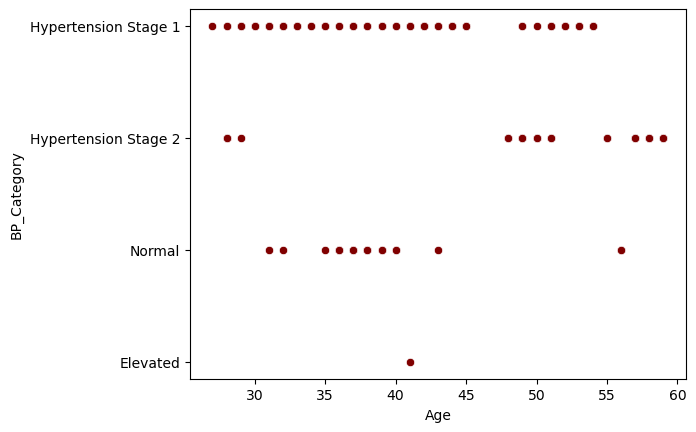

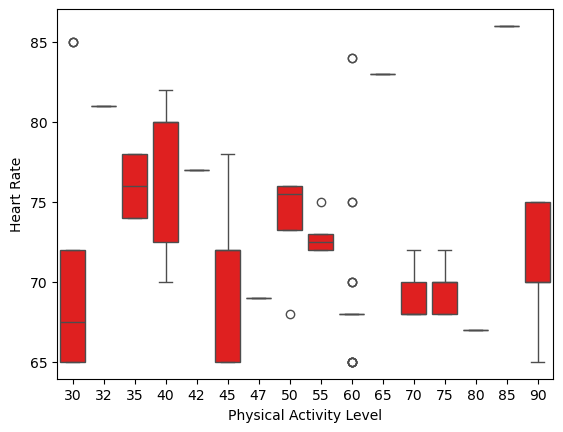

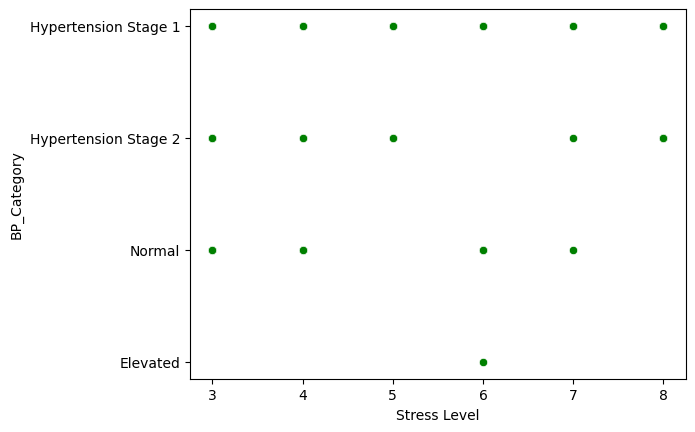

In [85]:
sns.scatterplot(df, x ='Age', y='BP_Category', color ='maroon')
plt.show()
sns.boxplot(df, x='Physical Activity Level', y='Heart Rate', color='red')
plt.show()
sns.scatterplot(df, x ='Stress Level', y='BP_Category', color ='green')
plt.show()

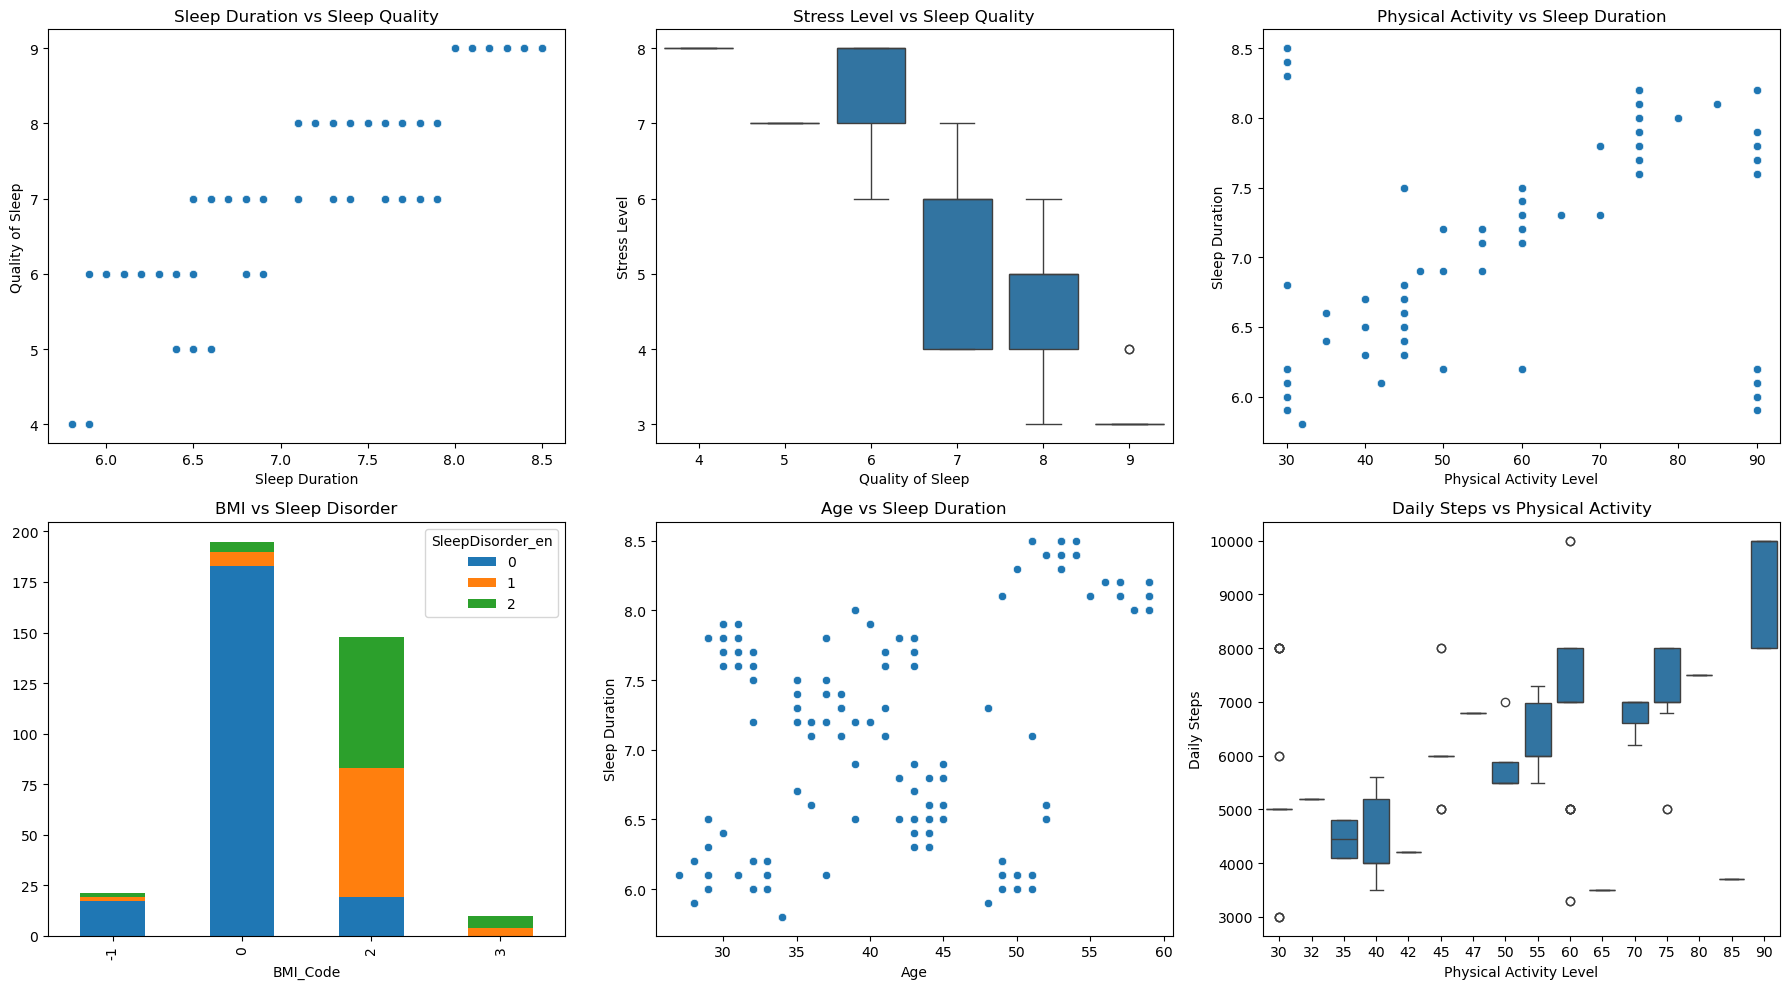

In [69]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Sleep Duration vs Sleep Quality
sns.scatterplot(data=df, x='Sleep Duration', y='Quality of Sleep', ax=axes[0,0])
axes[0,0].set_title("Sleep Duration vs Sleep Quality")

# Stress Level vs Sleep Quality
sns.boxplot(data=df, x='Quality of Sleep', y='Stress Level', ax=axes[0,1])
axes[0,1].set_title("Stress Level vs Sleep Quality")

# Physical Activity vs Sleep Duration
sns.scatterplot(data=df, x='Physical Activity Level', y='Sleep Duration', ax=axes[0,2])
axes[0,2].set_title("Physical Activity vs Sleep Duration")

# BMI Category vs Sleep Disorder (stacked bar)
pd.crosstab(df['BMI_Code'], df['SleepDisorder_en']).plot(
    kind='bar', stacked=True, ax=axes[1,0], legend=True
)
axes[1,0].set_title("BMI vs Sleep Disorder")

# Age vs Sleep Duration
sns.scatterplot(data=df, x='Age', y='Sleep Duration', ax=axes[1,1])
axes[1,1].set_title("Age vs Sleep Duration")

# Daily Steps vs Physical Activity Level
sns.boxplot(data=df, x='Physical Activity Level', y='Daily Steps', ax=axes[1,2])
axes[1,2].set_title("Daily Steps vs Physical Activity")

plt.tight_layout()
plt.show()


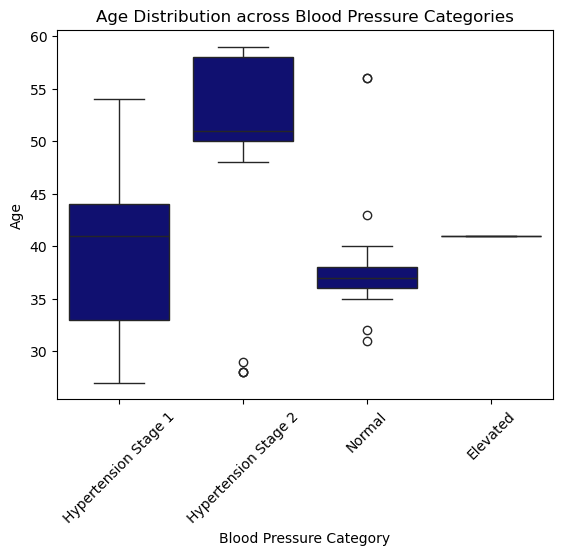

In [72]:
# Agevx Bp
sns.boxplot(data=df, x='BP_Category', y='Age', color ='navy')
plt.title("Age Distribution across Blood Pressure Categories")
plt.xlabel("Blood Pressure Category")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.show()